In [68]:
import pandas as pd
import numpy as np
import os, shutil
import time
from time import sleep
from tqdm.notebook import trange, tqdm
import tensorflow as tf
import IPython.display as display
import functools
import keras
from keras import models
from keras.applications import inception_v3
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from scipy.stats import ttest_ind
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Load in Images

The data directories are comprised of the file path strings, one for each train, test, and split. Within the file paths are two folders. One folder has normal chest xray photos (no pneumonia) and another folder has chest xrays of people with pneumonia.

In [69]:
datadir_train = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
datadir_test = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/test'
datadir_validate = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/val'
categories = ['NORMAL', 'PNEUMONIA']

# Data Augmentation

In [70]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_train, 
        target_size=(256, 256), 
        seed = 123,
        class_mode="binary") 

Found 5216 images belonging to 2 classes.


In [71]:
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_test, 
        target_size=(256, 256), 
        seed = 123,
        class_mode="binary",
        shuffle = False) 

Found 624 images belonging to 2 classes.


In [72]:
data_val = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_validate, 
        target_size=(256, 256), 
        seed = 12,
        class_mode="binary",
        shuffle = False) 

Found 16 images belonging to 2 classes.


# Images

In [73]:
train_images, train_labels = next(data_train)
test_images, test_labels = next(data_test)
val_images, val_labels = next(data_val)

In [74]:
train_labels[:10] #TO DO - label images as pneumonia or not

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

Exception ignored in: <function tqdm.__del__ at 0x0000021ABFAA3040>
Traceback (most recent call last):
  File "c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tqdm\std.py", line 1134, in __del__
    self.close()
  File "c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tqdm\notebook.py", line 280, in close
    self.disp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000021ABFAA3040>
Traceback (most recent call last):
  File "c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tqdm\std.py", line 1134, in __del__
    self.close()
  File "c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tqdm\notebook.py", line 280, in close
    self.disp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000021ABFAA3040>
Traceback (most recent cal

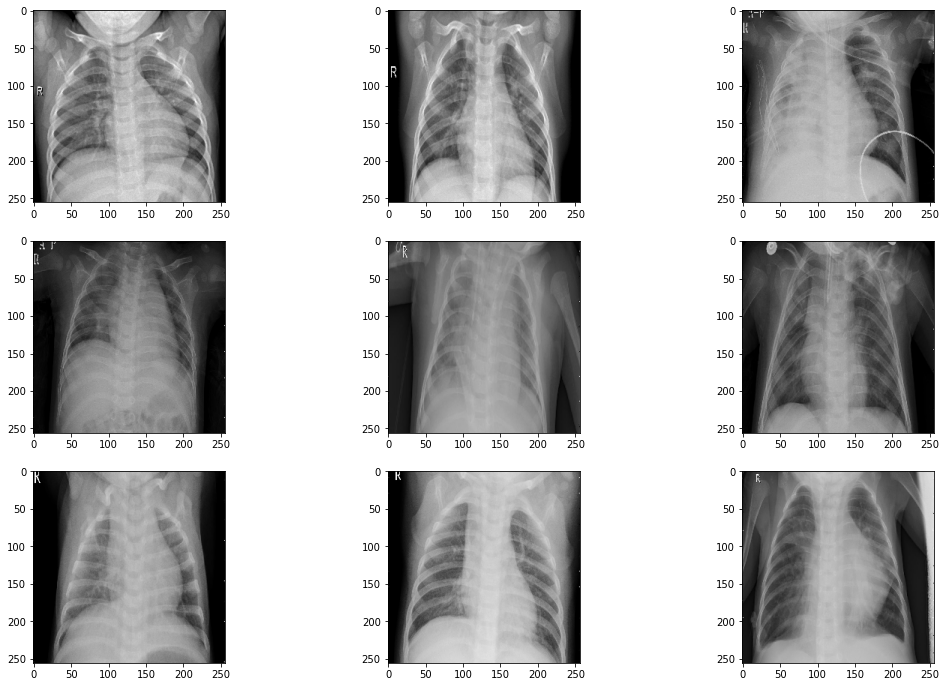

<Figure size 432x288 with 0 Axes>

In [75]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (18,12))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[i])
plt.show()

plt.savefig("chest_xrays.jpg")

# Modeling

## Model One - Feedforward Neural Network

In [76]:
X_train = np.array(train_images)
y_train = np.array(train_labels)

X_test = np.array(test_images)
y_test = np.array(test_labels)

X_val = np.array(val_images)
y_val = np.array(val_labels)

In [77]:
len(test_labels)

32

In [78]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [21]:
num_classes = 1

# specifying the model structure
model = Sequential()

#matching shape sizes
print(y_train.shape)
print(X_train.shape)

# specify the first hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# specify the second layer
model.add(Dense(64))
model.add(Dropout(0.2))

# specify the output layer
model.add(Dense(num_classes, activation='sigmoid'))

# model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

#history necessary for summary and evaluation
history = model.fit(X_train.flatten()[:len(y_train)], y_train,
                    batch_size= 1,
                    epochs=4,
                    verbose=1,
                    validation_data=(X_val.flatten()[:len(y_val)], y_val.flatten()))
score = model.evaluate(X_test.flatten()[:len(y_test)], y_test.flatten(), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(128,)
(128, 256, 256, 3)
Epoch 1/4
128/128 [==============================] - 3s 10ms/step - loss: 0.6301 - accuracy: 0.7373 - val_loss: 1.0361 - val_accuracy: 0.5000
Epoch 2/4
128/128 [==============================] - 1s 7ms/step - loss: 0.4567 - accuracy: 0.8368 - val_loss: 1.0471 - val_accuracy: 0.5000
Epoch 3/4
128/128 [==============================] - 1s 7ms/step - loss: 0.4968 - accuracy: 0.8122 - val_loss: 0.9518 - val_accuracy: 0.5000
Epoch 4/4
128/128 [==============================] - 1s 8ms/step - loss: 0.5086 - accuracy: 0.7963 - val_loss: 0.9851 - val_accuracy: 0.5000
Test loss: 1.544365406036377
Test accuracy: 0.0


## Model Two - CNN

In [23]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #padding added so edge pixels get included in convolution
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same')) #hidden layer
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #max pooling
cnn.add(layers.Flatten()) #flatten layer
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.007),
              metrics=['acc', 'Recall', 'Precision']) #compiling with gradient descent

history = cnn.fit(data_train,
                epochs=5,
                batch_size=50,
                validation_data = data_val)

Epoch 1/5
41/41 [==============================] - 788s 19s/step - loss: 4.0339 - acc: 0.6944 - recall: 0.8935 - precision: 0.7340 - val_loss: 0.6936 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 2/5
41/41 [==============================] - 689s 17s/step - loss: 0.6661 - acc: 0.7289 - recall: 1.0000 - precision: 0.7289 - val_loss: 0.7078 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 3/5
41/41 [==============================] - 646s 16s/step - loss: 0.6202 - acc: 0.7295 - recall: 1.0000 - precision: 0.7295 - val_loss: 0.7337 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 4/5
41/41 [==============================] - 672s 16s/step - loss: 0.5931 - acc: 0.7375 - recall: 1.0000 - precision: 0.7375 - val_loss: 0.7606 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 5/5
41/41 [==============================] - 892s 22s/step - loss: 0.5893 - acc: 0.7285 - recall: 1.0000 - precision: 0.7285 - val_loss: 0.781

In [26]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4194336   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [27]:
results_train = cnn.evaluate(data_train)
results_test = cnn.evaluate(data_test)
print(results_train, results_test)

5/5 [==============================] - 63s 10s/step - loss: 0.6765 - acc: 0.6250 - recall: 1.0000 - precision: 0.6250    
[0.5734502673149109, 0.7429064512252808, 1.0, 0.7429064512252808] [0.6764638423919678, 0.625, 1.0, 0.625]


In [79]:
pred.round()

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [80]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [89]:
y_test.shape

(32,)

In [88]:
pred.shape

(32, 1)

In [87]:
#confusion matrix
pred = cnn.predict(X_test)
confusion_matrix(y_test, pred.round())

array([[ 0, 32],
       [ 0,  0]], dtype=int64)

In [86]:
#confusion matrix
pred = cnn.predict(test_labels)
confusion_matrix(test_images, pred)

ValueError: in user code:

    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 1)


In [61]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4194336   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

## Model Three - CNN 

In [45]:
tic = time.time()
cnn3 = models.Sequential()
cnn3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn3.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn3.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn3.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(32, activation='relu'))
cnn3.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.002),
              metrics=['acc', 'Recall', 'Precision'])

In [55]:
history = cnn3.fit(data_train,
                    epochs=9,
                    batch_size=25,
                    validation_data=(data_val))
toc = time.time()
print('run time:', toc-tic)

Epoch 1/9
41/41 [==============================] - 347s 8s/step - loss: 0.6766 - acc: 0.7429 - recall: 1.0000 - precision: 0.7429 - val_loss: 0.6947 - val_acc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 2/9
 7/41 [====>.........................] - ETA: 4:45 - loss: 0.6664 - acc: 0.7444 - recall: 1.0000 - precision: 0.7444

KeyboardInterrupt: 

In [42]:
cnn3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
average_pooling2d_2 (Average (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 126, 126, 32)      18464     
_________________________________________________________________
average_pooling2d_3 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4064288   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [43]:
results_train3 = cnn3.evaluate(data_train)
results_test3 = cnn3.evaluate(data_test)
print(results_train3, results_test3)

5/5 [==============================] - 40s 6s/step - loss: 0.6866 - acc: 0.6250 - recall: 1.0000 - precision: 0.6250    
[0.677061140537262, 0.7429064512252808, 1.0, 0.7429064512252808] [0.6866476535797119, 0.625, 1.0, 0.625]


In [ ]:
#confusion matrix
pred3 = cnn3.predict(X_test)
confusion_matric(y_test, pred3)

## Model Four - CNN

In [ ]:
tic = time.time()
cnn4 = models.Sequential()
cnn4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn4.add(layers.MaxPooling2D((2, 2),padding='same'))
cnn4.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn4.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn4.add(layers.Flatten())
cnn4.add(layers.Dense(32, activation='relu'))
cnn4.add(layers.Dropout(.5))
cnn4.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn4.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.002),
              metrics=['acc', 'Recall', 'Precision', 'AUC'])

history = cnn4.fit(X_train,
                y_train,
                epochs=5,
                batch_size=25,
                validation_data=(X_val, y_val))
toc = time.time()
print('run time:', toc-tic)

In [ ]:
cnn4.summary()

In [ ]:
results_train = cnn4.evaluate(data_train)
results_test = cnn4.evaluate(data_test)
print(results_train, results_test)

In [ ]:
#confusion matrix
pred4 = cnn4.predict(X_test)
confusion_matric(y_test, pred4)

## Model 5 - InceptionV3

In [ ]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
inception_model = models.Sequential()
inception_model.add(imagenet)
inception_model.add(GlobalAveragePooling2D())
inception_model.add(Dense(1024,activation='relu'))
inception_model.add(Dense(1024,activation='relu')) #dense layer 2
inception_model.add(Dense(512,activation='relu')) #dense layer 3
inception_model.add(Dense(1,activation='sigmoid')) #final layer with sigmoid activation

In [ ]:
inception_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy', 'recall', 'percision', 'AUC'])

# step_size_train=train_generator.n//train_generator.batch_size
inception_model.fit(data_train,
          epochs=6,
          batch_size=32,
          validation_data=(data_val))

In [ ]:
inception_model.evaluate(X_train)

In [ ]:
predictions_transfer = inception_model.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

In [ ]:
#confusion matrix
pred5 = inception_model.predict(X_test)
confusion_matric(y_test, pred5)